In [54]:
import pandas as pd

df = pd.read_csv("data-ori.csv")
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [55]:
df.SOURCE.value_counts()

out    2628
in     1784
Name: SOURCE, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [57]:
df.shape

(4412, 11)

In [58]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


In [59]:
df['SOURCE'] = df['SOURCE'].map({'out':0 , 'in':1})

In [60]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,0
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,1
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,1
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,0
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,1


In [61]:
cat_cols = ['SEX']

for col in cat_cols:
    unique_categories = df[col].nunique()
    category_counts = df[col].value_counts(normalize=True) * 100
    print(f"\nColumn: {col}")
    print(f"Number of unique categories: {unique_categories}")
    print("Percentage of observations in each category:")
    print(category_counts)


Column: SEX
Number of unique categories: 2
Percentage of observations in each category:
M    51.903898
F    48.096102
Name: SEX, dtype: float64


In [62]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [63]:
class_imbalance = df['SOURCE'].value_counts(normalize=True) * 100
print("Class Imbalance:\n", class_imbalance)

Class Imbalance:
 0    59.564823
1    40.435177
Name: SOURCE, dtype: float64


<IPython.core.display.Javascript object>

<Axes: xlabel='SOURCE', ylabel='count'>

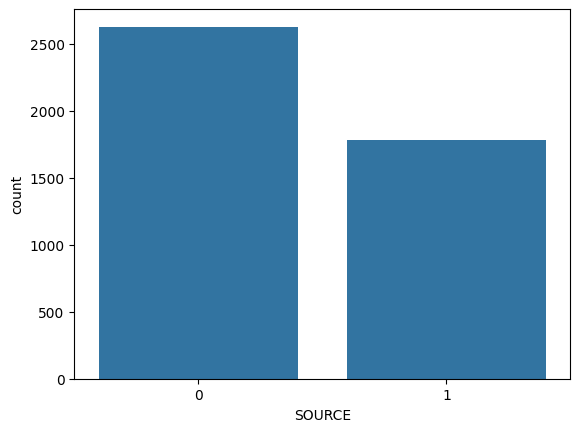

In [64]:
sns.countplot(x='SOURCE', data=df)

In [65]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [66]:
df.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

<IPython.core.display.Javascript object>

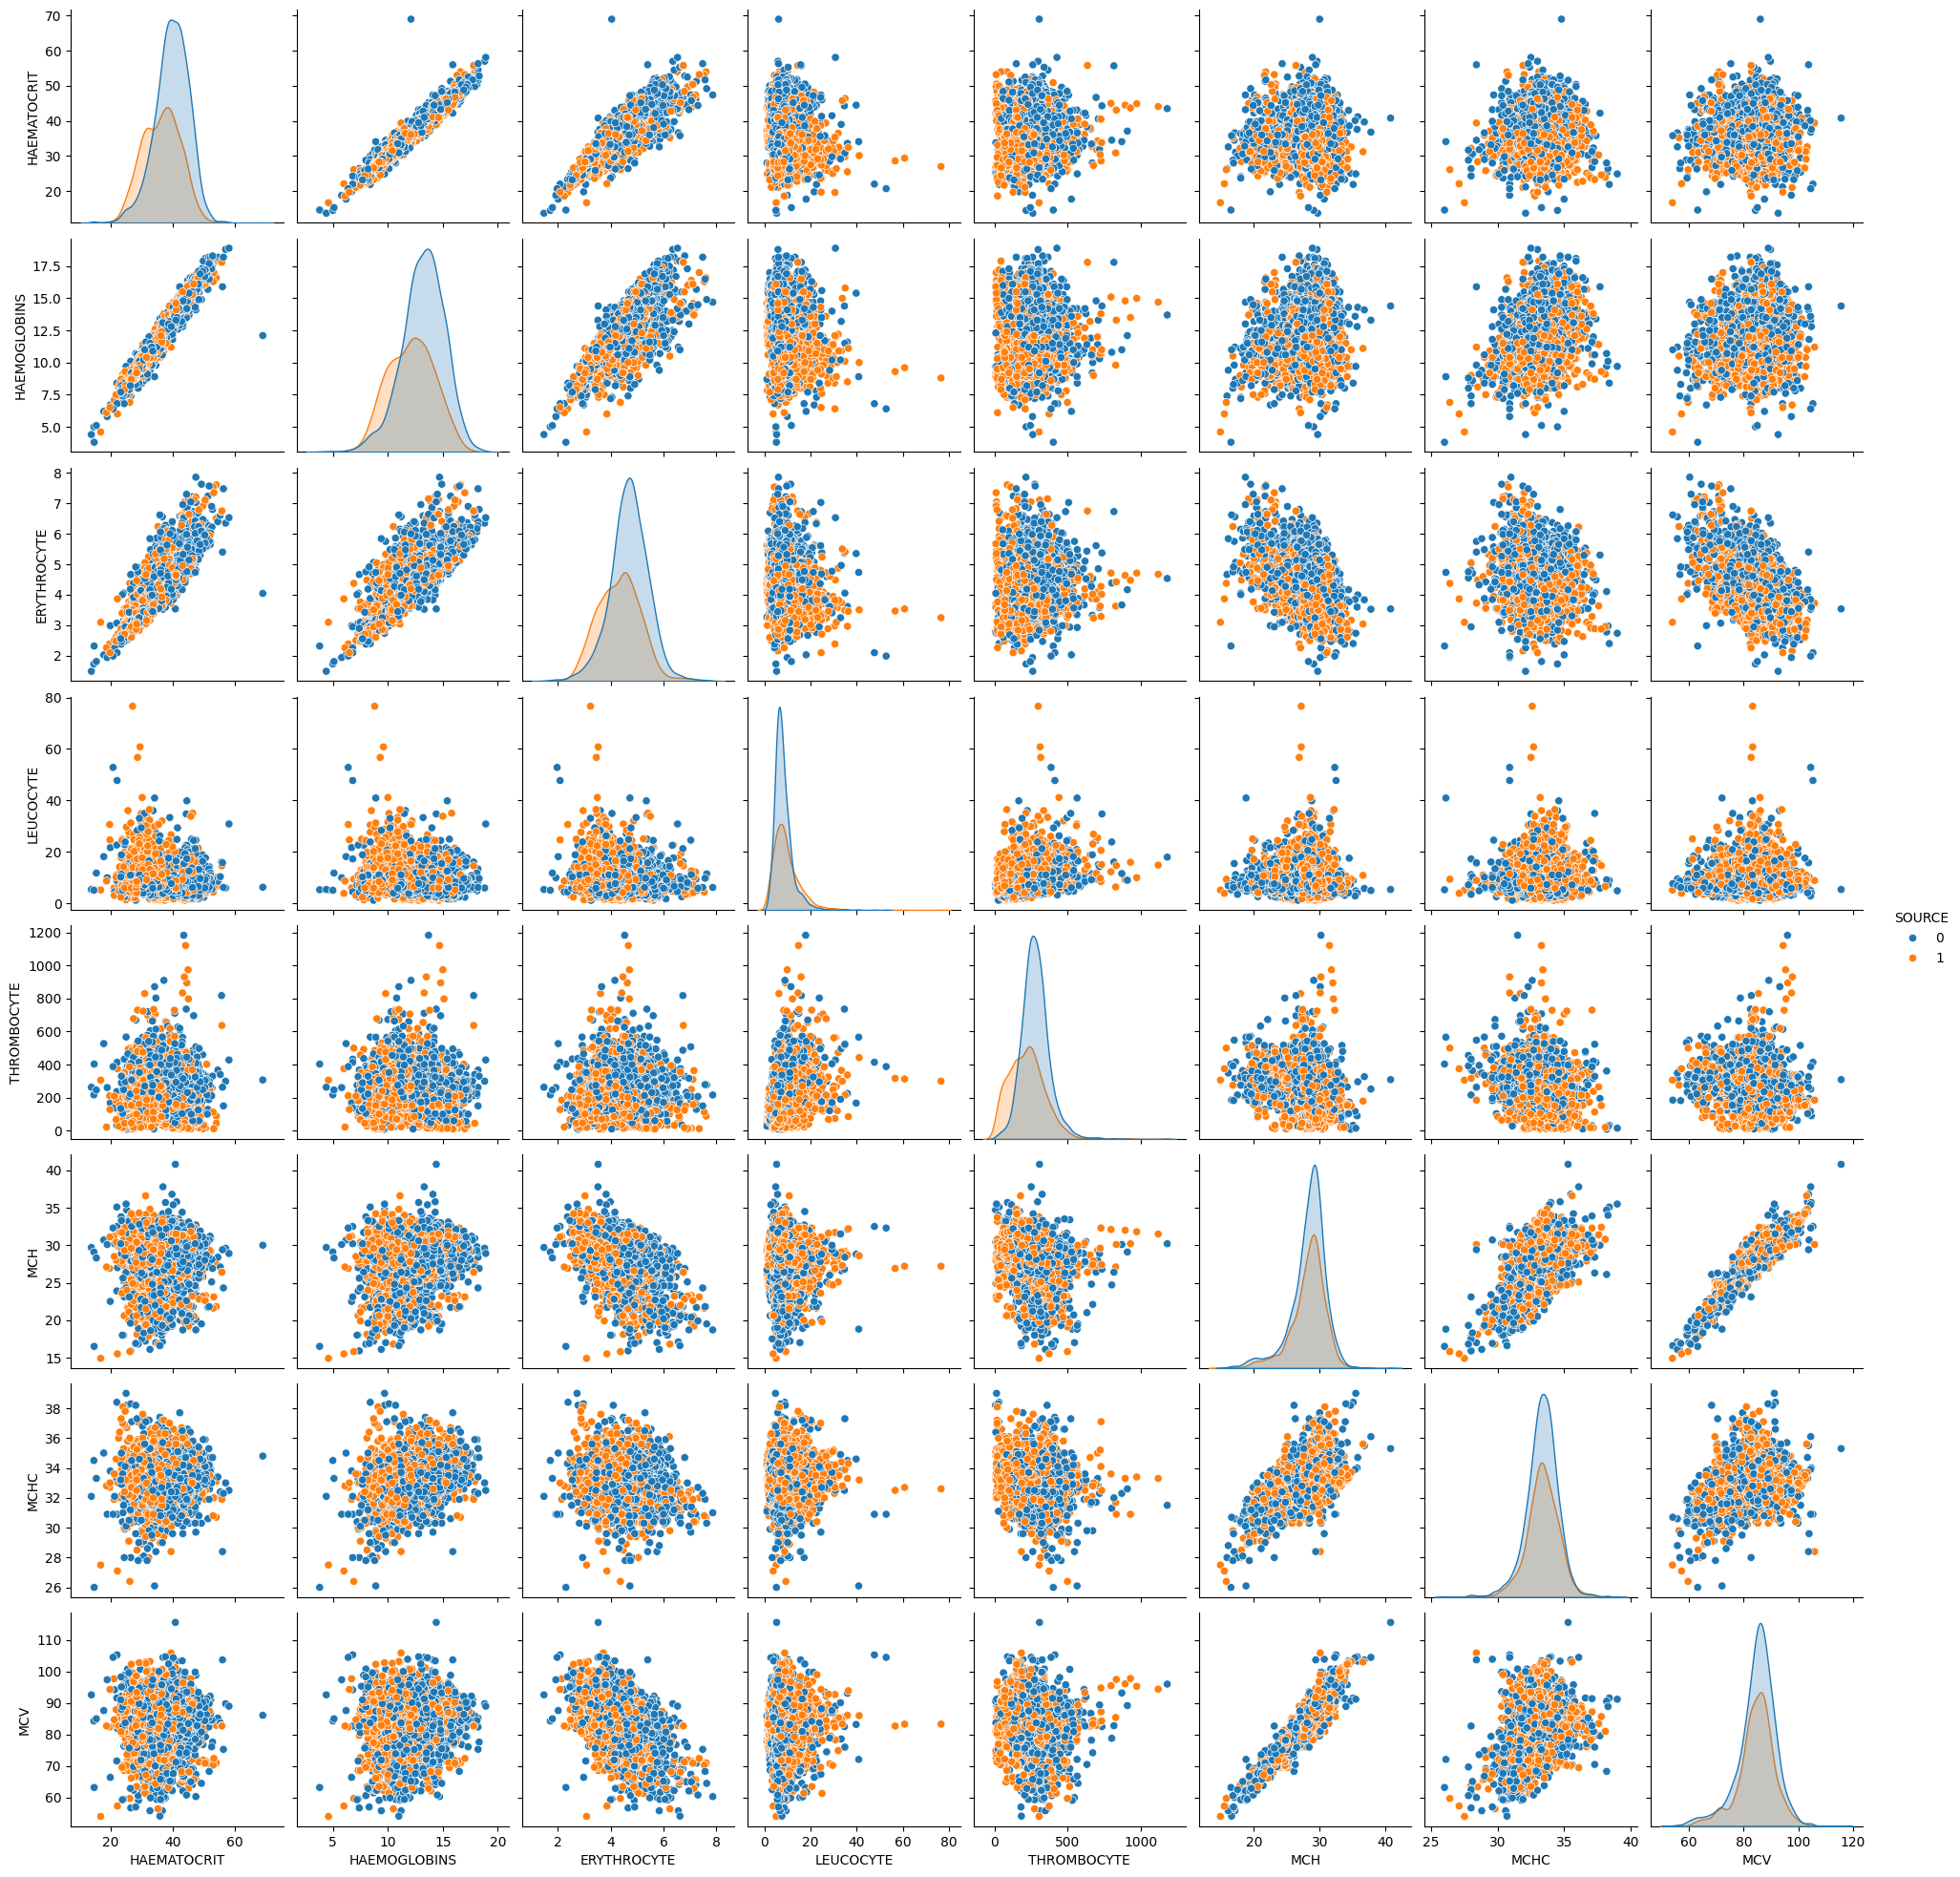

In [67]:
num_cols = ['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV']
sns.pairplot(df, hue='SOURCE', vars=num_cols)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

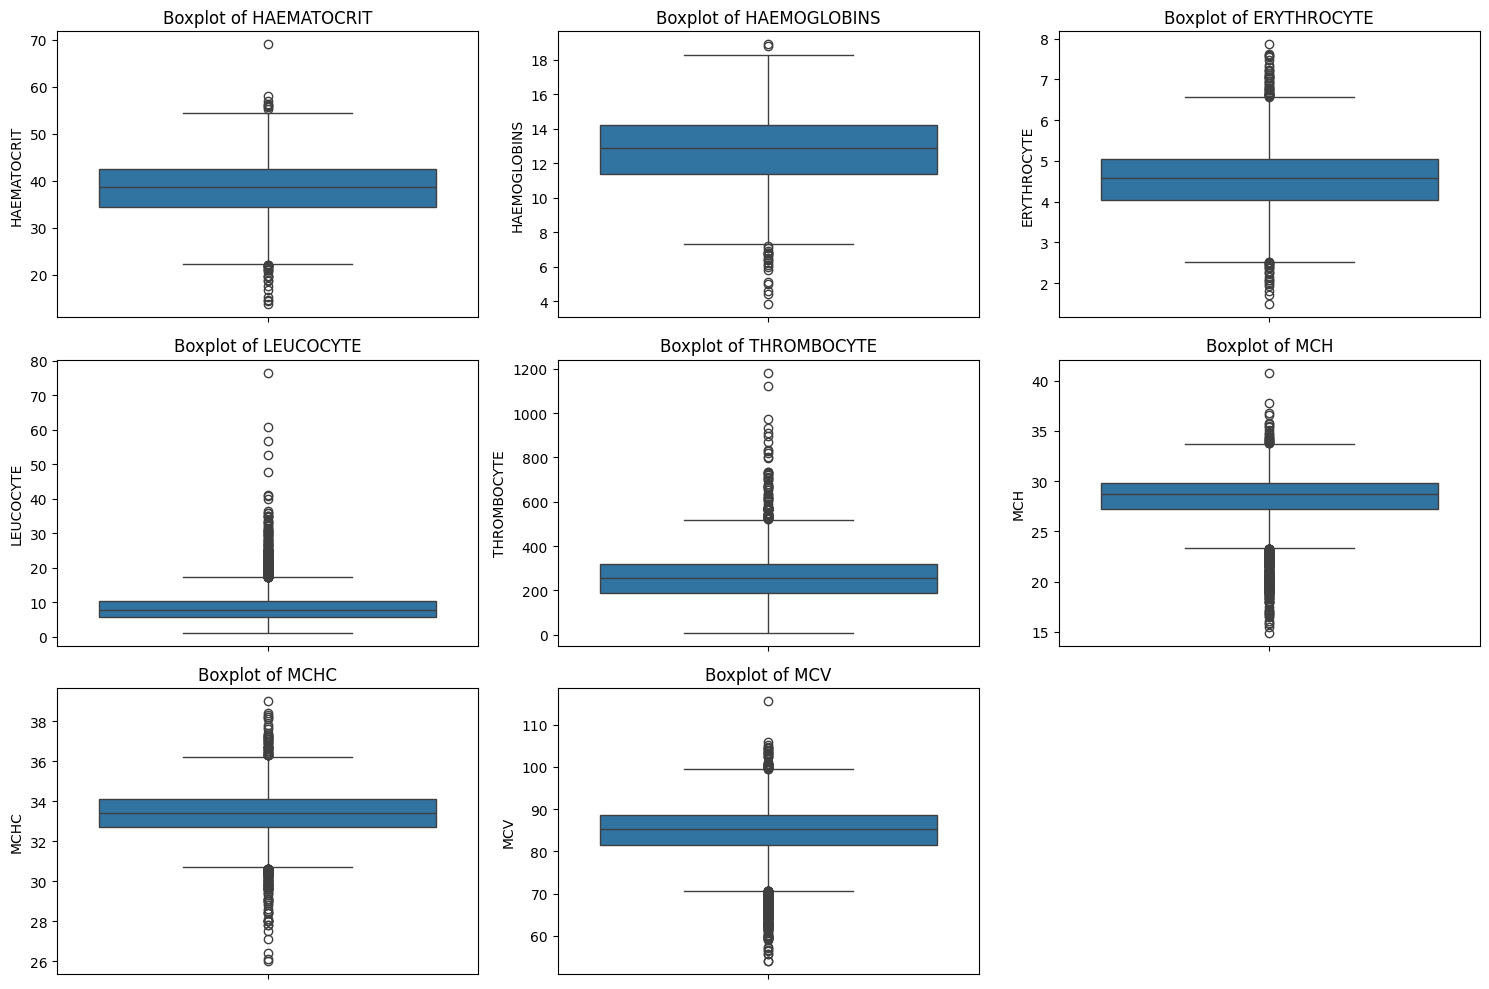

In [68]:
# Box plots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

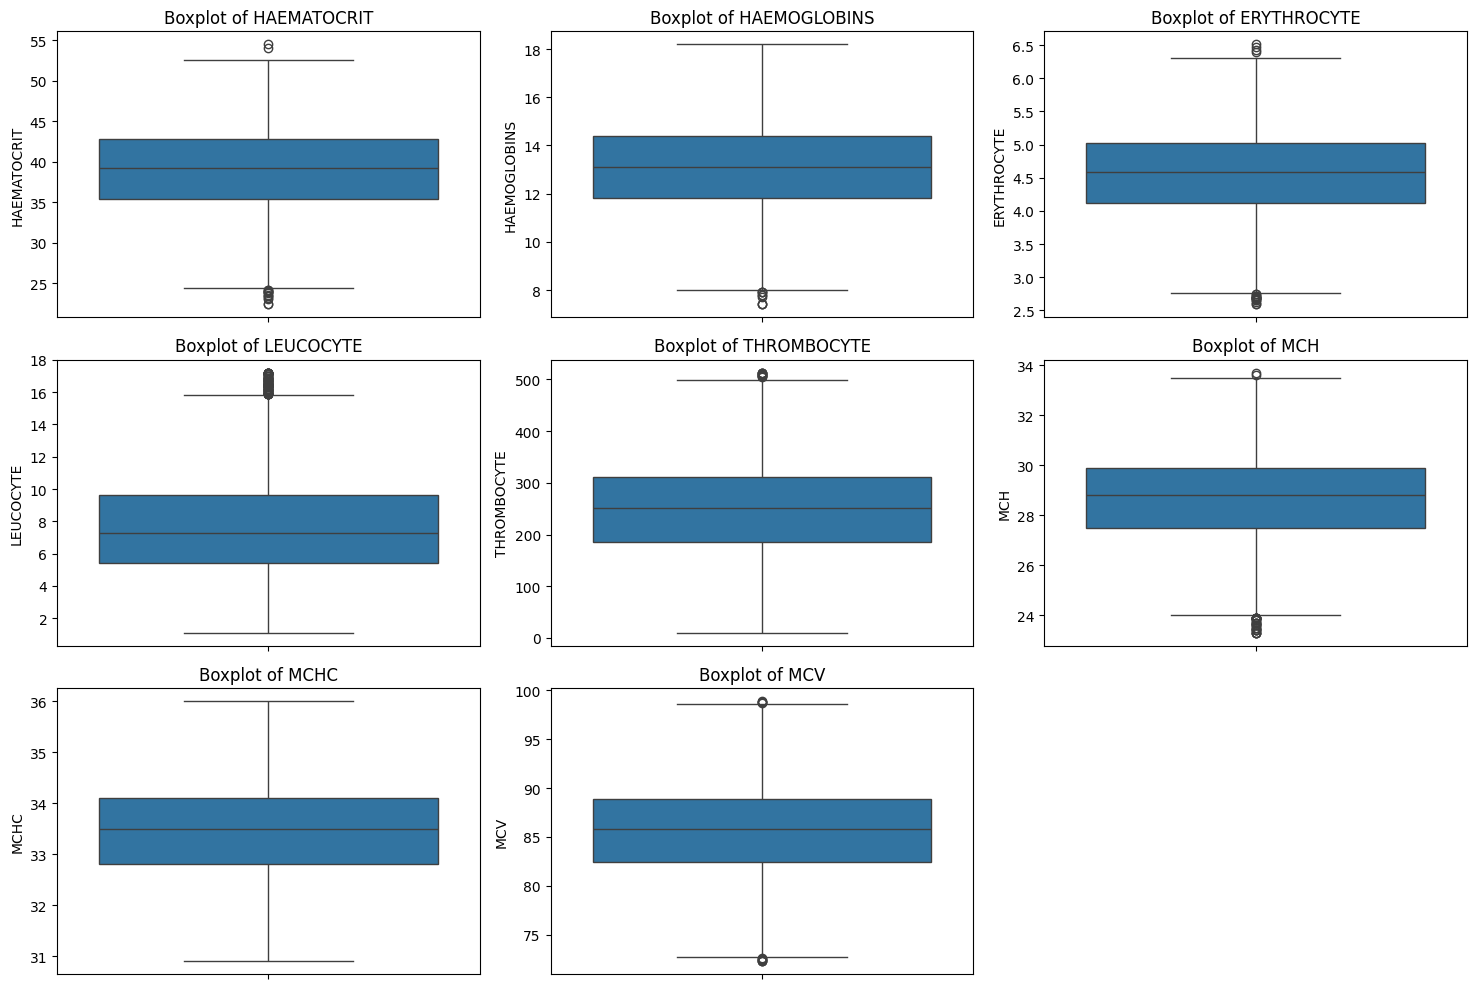

In [69]:
df = remove_outliers(df,num_cols)

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

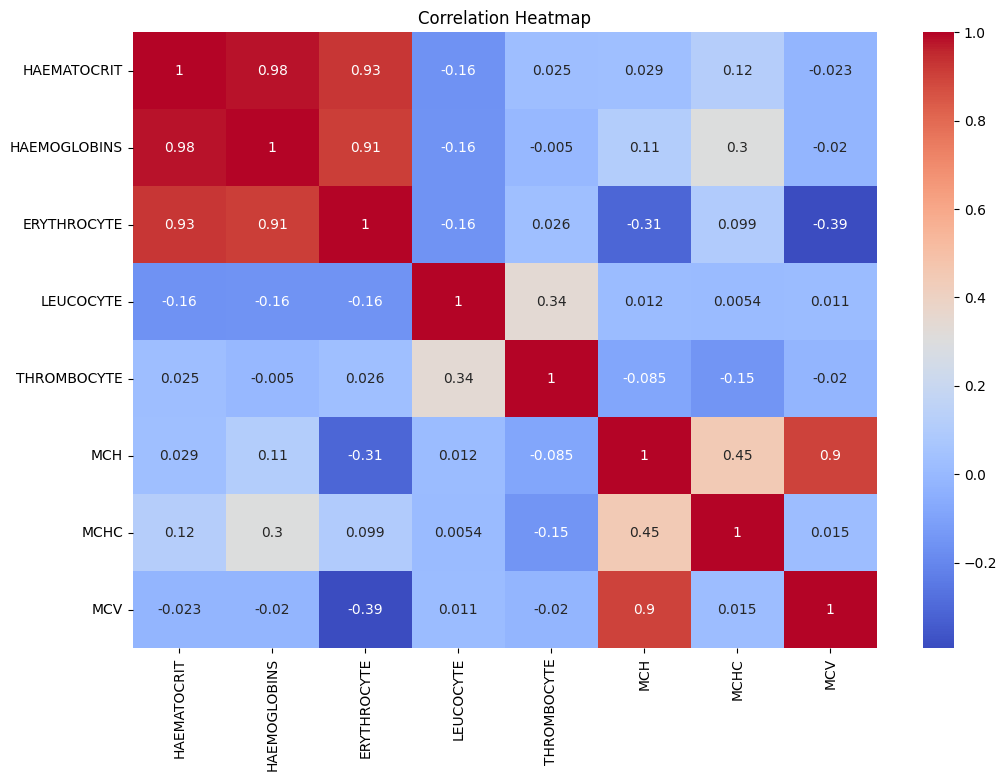

In [70]:
# Calculate correlation matrix
correlation_matrix = df[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [71]:
# Create dummy variables for categorical features
df = pd.get_dummies(df, drop_first=True)

# Drop the sl_no column as it is not relevant for prediction
df.drop(columns=['HAEMOGLOBINS','MCH'], inplace=True)

In [72]:
class_imbalance = df['SOURCE'].value_counts(normalize=True) * 100
print("Class Imbalance:\n", class_imbalance)

Class Imbalance:
 0    61.603033
1    38.396967
Name: SOURCE, dtype: float64


In [77]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define features and target
X = df.drop(columns=['SOURCE'])
y = df['SOURCE']

smote = SMOTE(random_state=2)
X, y = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check if the split is representative of the overall data
train_class_balance = y_train.value_counts(normalize=True)
test_class_balance = y_test.value_counts(normalize=True)
print("Train Class Balance:\n", train_class_balance)
print("Test Class Balance:\n", test_class_balance)

Train Class Balance:
 1    0.500157
0    0.499843
Name: SOURCE, dtype: float64
Test Class Balance:
 0    0.500366
1    0.499634
Name: SOURCE, dtype: float64


In [78]:
#MODELS

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Fit a base Logistic Regression model
base_model = LogisticRegression(max_iter=1000, random_state=42)
base_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [80]:
# Predictions
y_pred_train = base_model.predict(X_train)
y_pred_test = base_model.predict(X_test)

In [81]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.7070643642072213
Test Accuracy: 0.701098901098901


In [82]:
print("Train Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      1592
           1       0.72      0.68      0.70      1593

    accuracy                           0.71      3185
   macro avg       0.71      0.71      0.71      3185
weighted avg       0.71      0.71      0.71      3185

Test Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       683
           1       0.71      0.68      0.69       682

    accuracy                           0.70      1365
   macro avg       0.70      0.70      0.70      1365
weighted avg       0.70      0.70      0.70      1365



In [83]:
# Classification report already gives Precision, Recall, and F1 Score
# We can also calculate these metrics individually if needed
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.7107692307692308
Recall: 0.6774193548387096
F1 Score: 0.6936936936936937


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Using RandomForest with GridSearch for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predictions
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Accuracy
train_accuracy_best = accuracy_score(y_train, y_pred_train_best)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)
print(f"Improved Train Accuracy: {train_accuracy_best}")
print(f"Improved Test Accuracy: {test_accuracy_best}")

print("Improved Train Classification Report:\n", classification_report(y_train, y_pred_train_best))
print("Improved Test Classification Report:\n", classification_report(y_test, y_pred_test_best))

Improved Train Accuracy: 1.0
Improved Test Accuracy: 0.7648351648351648
Improved Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      3185
   macro avg       1.00      1.00      1.00      3185
weighted avg       1.00      1.00      1.00      3185

Improved Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       683
           1       0.77      0.76      0.76       682

    accuracy                           0.76      1365
   macro avg       0.76      0.76      0.76      1365
weighted avg       0.76      0.76      0.76      1365



<IPython.core.display.Javascript object>

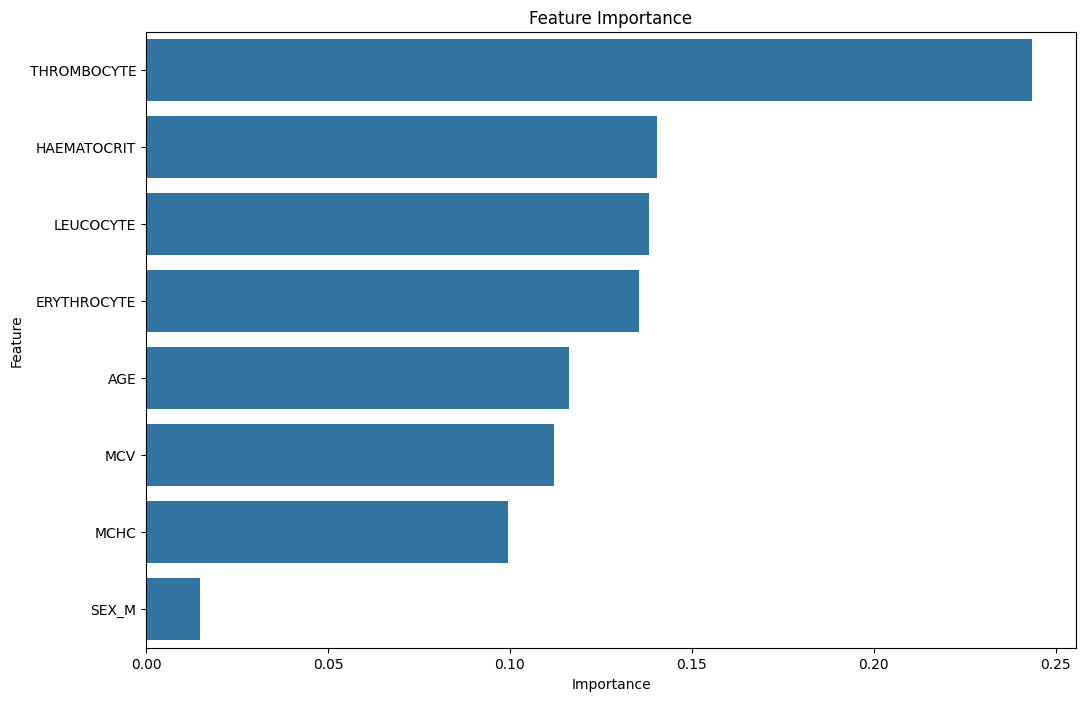

Feature Importance:
        Feature  Importance
3  THROMBOCYTE    0.243390
0  HAEMATOCRIT    0.140305
2    LEUCOCYTE    0.138339
1  ERYTHROCYTE    0.135331
6          AGE    0.116109
5          MCV    0.112067
4         MCHC    0.099519
7        SEX_M    0.014939


In [85]:
# Feature importances
importances = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

print("Feature Importance:\n", feature_importance_df)

In [89]:
X = df.drop(columns=['SOURCE'])
y = df['SOURCE']

smote = SMOTE(random_state=2)
X, y = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
# You can adjust the test_size and random_state parameters as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
# You can adjust the parameters of RandomForestClassifier as needed
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       458
           1       0.80      0.74      0.77       452

    accuracy                           0.78       910
   macro avg       0.78      0.78      0.78       910
weighted avg       0.78      0.78      0.78       910



       Feature  Importance
3  THROMBOCYTE    0.243503
0  HAEMATOCRIT    0.144486
1  ERYTHROCYTE    0.136756
2    LEUCOCYTE    0.133488
6          AGE    0.114057
5          MCV    0.110911
4         MCHC    0.100972
7        SEX_M    0.015827


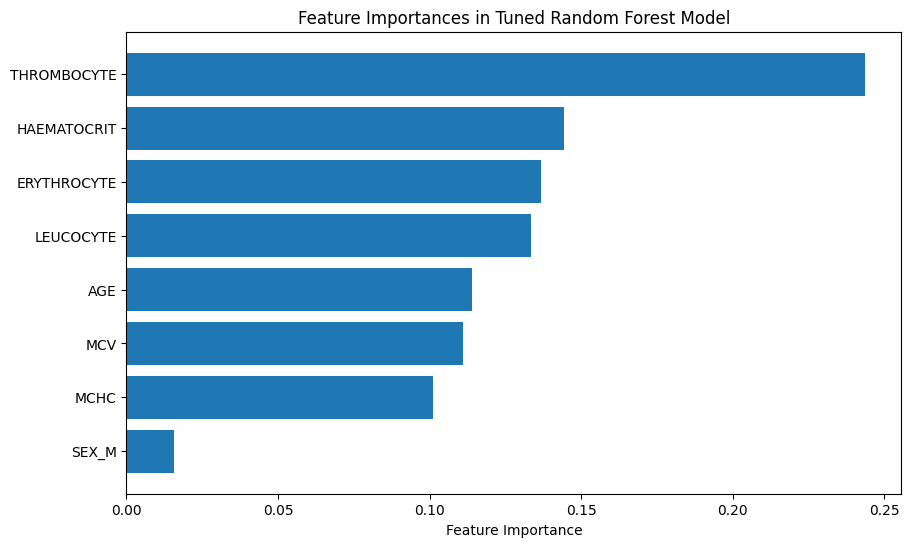

In [90]:
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Tuned Random Forest Model')
plt.show()

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay

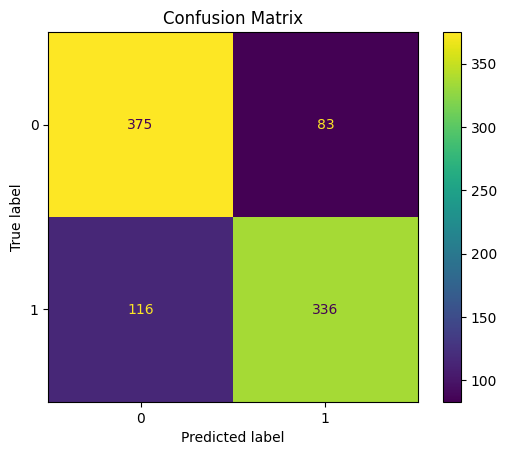

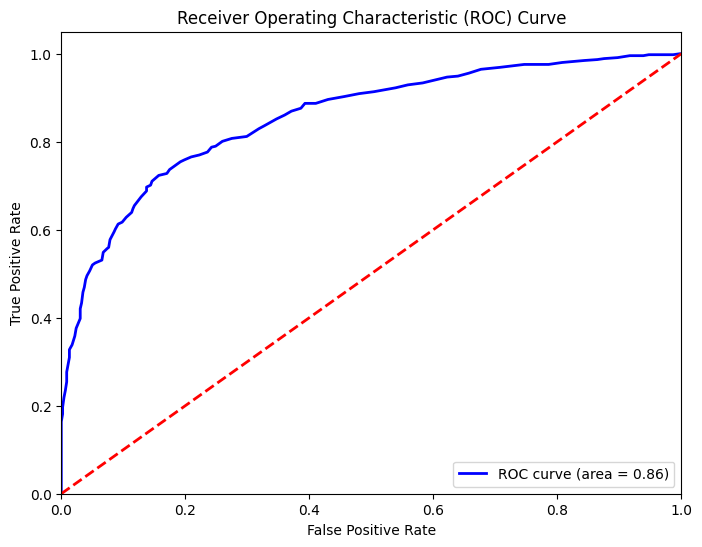

In [92]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()


y_prob = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()